In [26]:
import os 
import numpy as np 
import pandas as pd
import nibabel as nib


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



In [14]:
#check for avialble data as volumes in their original folders uisng training data
b30f_b50f = pd.read_csv("/nfs/masi/krishar1/PairedKernelconversion_MedPhysrevisions/select_cases/B30f_B50f.old_new_combined.csv")
b30f_b50f

,pid,manufacture,model_name,kernel_pair,soft_uid,hard_uid,z_dim,aligned,split
0,119808,SIEMENS,Sensation 16,B30f_B50f,1.2.840.113654.2.55.17352217618723597124729454...,1.2.840.113654.2.55.86343585676203469571074868...,157,0,NaN
1,107386,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.19562839359738501594207796...,1.2.840.113654.2.55.20799692875944516658738431...,143,0,NaN
2,118235,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.29977814554558753930835504...,1.2.840.113654.2.55.21204398152921294087707396...,129,1,test
3,104377,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.29088353772475843782428438...,1.2.840.113654.2.55.28448230604158994465172380...,159,0,NaN
4,121296,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.14167896543881983307698593...,1.2.840.113654.2.55.20471379436882463252383384...,161,1,test
...,...,...,...,...,...,...,...,...,...
562,118866,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.21351351688708513614632005...,1.2.840.113654.2.55.29552510021978764008918763...,179,1,train
563,118985,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.30588910536299610870125426...,1.2.840.113654.2.55.82653390530190158324225349...,123,1,train
564,118918,SIEMENS,Sensation 16,B30f_B50f,1.2.840.113654.2.55.31194074237281440923844563...,1.2.840.113654.2.55.30506740267475851965630420...,164,1,train
565,122201,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.32131027968265553732825870...,1.2.840.113654.2.55.74193977573721246377813398...,152,1,train


In [15]:
#Obtain all patient IDS of the training data images. 
train_b30f_b50f = pd.read_csv("/nfs/masi/krishar1/Kernel_conversion_outputs/KernelConversion/Data/B30f_B50f/slice_index.csv")
train_b30f_b50f

,pid,slice_idx,slice_total,split,slice_file_name
0,106188,0,150,train,106188_000.nii.gz
1,106188,1,150,train,106188_001.nii.gz
2,106188,2,150,train,106188_002.nii.gz
3,106188,3,150,train,106188_003.nii.gz
4,106188,4,150,train,106188_004.nii.gz
...,...,...,...,...,...
16486,214250,170,175,train,214250_170.nii.gz
16487,214250,171,175,train,214250_171.nii.gz
16488,214250,172,175,train,214250_172.nii.gz
16489,214250,173,175,train,214250_173.nii.gz


In [16]:
#Obtain all uniqe patient IDS of the training data images that have a split = train
train_b30f_b50f = train_b30f_b50f[train_b30f_b50f['split'] == 'train']
train_b30f_b50f = train_b30f_b50f['pid'].unique()
train_b30f_b50f, len(train_b30f_b50f)

(array([106188, 114748, 116612, 203680, 216761, 112576, 131750, 101829,
        103371, 118020, 204350, 100760, 216141, 203198, 100507, 103069,
        111615, 101413, 134590, 213124, 125031, 104138, 111362, 100803,
        121096, 215647, 114585, 119764, 117820, 125665, 204819, 107151,
        132963, 128991, 110257, 122256, 124108, 117057, 104465, 112557,
        217124, 100900, 211348, 126930, 127934, 118161, 109441, 118596,
        119178, 115399, 130751, 122305, 111874, 131207, 113436, 120838,
        129992, 105383, 113511, 114485, 130144, 134320, 126157, 210489,
        217847, 123243, 123682, 127400, 114843, 217245, 111430, 132074,
        116830, 108810, 114548, 207187, 114658, 203941, 101109, 122924,
        122068, 130808, 119359, 128940, 119696, 109642, 208839, 130849,
        116799, 123083, 117530, 104965, 132736, 118866, 131861, 118985,
        118918, 122201, 106110, 214250]),
 100)

In [17]:
#check if the patientIDS in the training data are present in the sampled data
train_b30_b50f_pids = list(train_b30f_b50f)
train_samples = b30f_b50f[b30f_b50f['pid'].isin(train_b30_b50f_pids)]
train_samples 

,pid,manufacture,model_name,kernel_pair,soft_uid,hard_uid,z_dim,aligned,split
6,216761,SIEMENS,Sensation 16,B30f_B50f,1.3.6.1.4.1.14519.5.2.1.7009.9004.128977724283...,1.3.6.1.4.1.14519.5.2.1.7009.9004.535877165260...,207,1,train
11,101829,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.14730180389050350265015402...,1.2.840.113654.2.55.13564462228038521090221844...,138,1,train
12,103371,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.27334627867252615366506118...,1.2.840.113654.2.55.32275133063892473980595710...,156,1,train
13,118020,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.16821638597574904815907394...,1.2.840.113654.2.55.26940134144895011199493287...,156,1,train
14,100760,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.50009514812721468683653258...,1.2.840.113654.2.55.13442835925244545135387500...,133,1,train
...,...,...,...,...,...,...,...,...,...
562,118866,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.21351351688708513614632005...,1.2.840.113654.2.55.29552510021978764008918763...,179,1,train
563,118985,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.30588910536299610870125426...,1.2.840.113654.2.55.82653390530190158324225349...,123,1,train
564,118918,SIEMENS,Sensation 16,B30f_B50f,1.2.840.113654.2.55.31194074237281440923844563...,1.2.840.113654.2.55.30506740267475851965630420...,164,1,train
565,122201,SIEMENS,Volume Zoom,B30f_B50f,1.2.840.113654.2.55.32131027968265553732825870...,1.2.840.113654.2.55.74193977573721246377813398...,152,1,train


In [20]:
train_samples.to_csv("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B50f_B30f_data.csv", index=False)

In [ ]:
#Do it for the other datasets
def make_data(mixed_df, train_data_df):
    """
    mixed_df: Dataframe containing all the patient IDS and images from the curated additional dataset from Medical Physics Journal revisions 
    train_data_df: Training data dataframe with split, slice indices and pids
    
    Returns a dataframe containing the pat
    """
    train_data = train_data_df[train_data_df['split'] == 'train']
    train_data = train_data['pid'].unique()
    #check if the length is 100
    if len(train_data) != 100:
        print("Sampled dataframe does not contain 100 subjects. Need to check the training data")
    else:
        print("Training data has 100 subjects. Proceeding with the data extraction")
        print(train_data)
        pids = list(train_data)
        train_samples = mixed_df[mixed_df['pid'].isin(pids)]
        return train_samples

In [22]:
c_d = pd.read_csv("/nfs/masi/krishar1/PairedKernelconversion_MedPhysrevisions/select_cases/C_D.old_new_combined.csv")
std_bone = pd.read_csv("/nfs/masi/krishar1/PairedKernelconversion_MedPhysrevisions/select_cases/STANDARD_BONE.old_new_combined.csv")
std_lung = pd.read_csv("/nfs/masi/krishar1/PairedKernelconversion_MedPhysrevisions/select_cases/STANDARD_LUNG.old_new_combined.csv")

train_c_d = pd.read_csv("/nfs/masi/krishar1/Kernel_conversion_outputs/KernelConversion/Data/C_D/slice_index.csv")
train_std_bone = pd.read_csv("/nfs/masi/krishar1/Kernel_conversion_outputs/KernelConversion/Data/STANDARD_BONE/slice_index.csv")
train_std_lung = pd.read_csv("/nfs/masi/krishar1/Kernel_conversion_outputs/KernelConversion/Data/STANDARD_LUNG/slice_index.csv")

train_c_d_samples = make_data(c_d, train_c_d)
train_std_bone_samples = make_data(std_bone, train_std_bone)
train_std_lung_samples = make_data(std_lung, train_std_lung)

Training data has 100 subjects. Proceeding with the data extraction
Training data has 100 subjects. Proceeding with the data extraction
Training data has 100 subjects. Proceeding with the data extraction


In [24]:
#Sum up the z_dim of the training data and give the total number of images
train_c_d_samples['z_dim'].sum(), train_std_bone_samples['z_dim'].sum(), train_std_lung_samples['z_dim'].sum()

(19359, 14614, 15723)

In [25]:
train_c_d_samples.to_csv("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/C_D_data.csv", index=False)
train_std_bone_samples.to_csv("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_BONE_data.csv", index=False)
train_std_lung_samples.to_csv("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_LUNG_data.csv", index=False)

Processing /valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_BONE/hard/103512.nii.gz
Processing /valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_BONE/hard/123658.nii.gz
Processing /valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_BONE/hard/127195.nii.gz
Processing /valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_BONE/hard/127554.nii.gz
Processing /valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_BONE/hard/127681.nii.gz
Processing /valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_BONE/hard/212319.nii.gz
Processing /valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_BONE/hard/117802.nii.gz
Processing /valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_BONE/hard/120350.nii.gz
Processing /valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_BONE/hard/129843.nii.gz
Processing /valiant02/masi/krishar1/TotalSegme

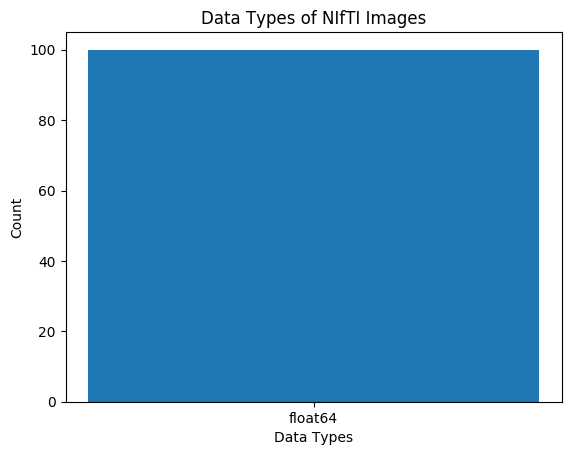

In [ ]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

def process_nifti_images(directories):
    data_types = []

    for directory in tqdm(directories):
        for file in tqdm(os.listdir(directory)):
            if file.endswith(".nii.gz"):
                file_path = os.path.join(directory, file)
                # print(f"Processing {file_path}")

                # Load the NIfTI image
                nifti_image = nib.load(file_path)
                image_data = nifti_image.get_fdata()

                # Check the data type
                data_type = image_data.dtype
                data_types.append(str(data_type))

    return data_types

def plot_data_types(data_types):
    counter = Counter(data_types)
    data_type_names = list(counter.keys())
    counts = list(counter.values())

    plt.bar(data_type_names, counts)
    plt.xlabel('Data Types')
    plt.ylabel('Count')
    plt.title('Data Types of NIfTI Images')
    plt.show()

# List of directories containing the NIfTI images
directories = [
    "/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_BONE/hard",
    "/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_LUNG/hard",
    "/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard",
    "/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/C_D/hard",
    "/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_BONE/soft",
    "/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/STANDARD_LUNG/soft",
    "/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/soft",
    "/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/C_D/soft"
]

data_types = process_nifti_images(directories)
plot_data_types(data_types)